In [261]:
import pandas as pd
from itertools import combinations
import math
import numpy as np
import statistics
from itertools import permutations
from bioinfokit import analys, visuz
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint
from matplotlib_venn import venn2

In [262]:
#pd.set_option('display.max_rows', 400)
data = pd.read_csv("../data/cnvator_data_sudmant_overlapped.csv")


anotation = pd.read_csv('/branchinecta/jbazanwilliamson/SGDP_anotation.csv', sep=',', encoding='latin-1',  index_col=1)

data

,Sample_ID,Chr,Start_original,End_original,Start,End,SIZE,SCORE,RD,LENGHT,P-VALUE,GAUSSIAN
0,LP6005441-DNA_A01,1,231001,237900,228416,267160,3.0,duplication,2.089230,6900.0,0.000000e+00,5.215800e-35
1,LP6005441-DNA_A01,1,471201,551200,471226,471326,1.0,deletion,0.187758,80000.0,1.992160e-12,2.215930e+09
2,LP6005441-DNA_A01,1,723801,728100,712534,763301,3.0,duplication,1.594500,4300.0,1.120070e-02,1.742820e+09
3,LP6005441-DNA_A01,1,1010901,1014200,1009660,1015541,1.0,deletion,0.498249,3300.0,5.434590e-04,2.196950e+09
4,LP6005441-DNA_A01,1,4124201,4127700,4120597,4131559,1.0,deletion,0.505571,3500.0,4.553500e-11,2.217790e-35
...,...,...,...,...,...,...,...,...,...,...,...,...
256113,SS6004480,X,153459601,153466400,153408881,153523661,3.0,duplication,1.882080,6800.0,3.234320e-09,7.076210e+01
256114,SS6004480,X,153474401,153496200,153408881,153523661,3.0,duplication,1.734000,21800.0,0.000000e+00,2.123580e+09
256115,SS6004480,X,153498901,153518500,153408881,153523661,3.0,duplication,1.886020,19600.0,0.000000e+00,2.117350e+07
256116,SS6004480,X,154798801,154804000,154789310,154826421,1.0,deletion,0.315173,5200.0,3.064860e-11,2.713240e+05


In [263]:
cnv = data.pivot_table(index=["Chr", "Start", "End"], 
                    columns='Sample_ID', 
                    values='RD').reset_index()
cnv.loc[cnv['Chr'] == '8']

Sample_ID,Chr,Start,End,LP6005441-DNA_A01,LP6005441-DNA_A03,LP6005441-DNA_A04,LP6005441-DNA_A05,LP6005441-DNA_A06,LP6005441-DNA_A08,LP6005441-DNA_A09,...,SS6004471,SS6004472,SS6004473,SS6004474,SS6004475,SS6004476,SS6004477,SS6004478,SS6004479,SS6004480
7314,8,328860,335939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7315,8,593901,599598,0.000000,0.000513,NaN,0.000000,0.45164,NaN,0.408189,...,0.522202,NaN,NaN,0.001043,0.512552,0.486635,0.127359,0.495626,0.511263,NaN
7316,8,973671,986606,NaN,NaN,0.464672,0.479631,NaN,0.451451,0.330004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7317,8,1233318,1236113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7318,8,1304525,1307677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7790,8,145534576,145536377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7791,8,145616372,145619289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.298549
7792,8,145701887,145708679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7793,8,146195179,146224164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [264]:
coordinates = cnv.iloc[:,0:2]
cnvs = cnv.iloc[:,3:284]
cnvs = cnvs.T
cnvs = cnvs.fillna(2)
cnvs

,0,1,2,3,4,5,6,7,8,9,...,8640,8641,8642,8643,8644,8645,8646,8647,8648,8649
Sample_ID,,,,,,,,,,,,,,,,,,,,,
LP6005441-DNA_A01,2.089230,0.187758,1.594500,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,2.00000,2.000000,2.000000,2.0,2.0,2.000000,2.000000,2.0,2.000000
LP6005441-DNA_A03,1.098060,0.795844,2.104280,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,2.00000,2.000000,2.000000,2.0,2.0,0.563718,0.563718,2.0,0.532579
LP6005441-DNA_A04,1.088959,0.089448,2.000000,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,2.00000,2.000000,2.000000,2.0,2.0,0.062768,0.062768,2.0,2.000000
LP6005441-DNA_A05,1.945120,0.000136,2.000000,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,1.61902,2.000000,2.000000,2.0,2.0,0.118046,0.118046,2.0,2.000000
LP6005441-DNA_A06,1.743018,0.002116,2.000000,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,2.00000,2.000000,2.000000,2.0,2.0,0.097334,0.097334,2.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS6004476,2.087340,0.000687,2.417060,2.0,2.0,2.0,1.46004,2.0,2.0,0.401630,...,2.00000,2.00000,0.162154,0.162154,2.0,2.0,0.167378,0.167378,2.0,2.000000
SS6004477,0.971431,0.289939,2.417685,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,2.00000,2.000000,2.000000,2.0,2.0,2.000000,2.000000,2.0,0.009885
SS6004478,1.032574,0.088507,2.628050,2.0,2.0,2.0,2.00000,2.0,2.0,0.307040,...,0.53303,2.00000,2.000000,2.000000,2.0,2.0,2.000000,2.000000,2.0,0.001413


In [265]:
features = anotation.loc[:,["7-Gender","10-Region", "11-Country",]]
dt = features.merge(cnvs, left_index=True, right_index=True)
dt.var()


0       0.187688
1       0.020266
2       0.044329
3       0.005441
4       0.011714
          ...   
8645    0.089170
8646    0.784804
8647    0.787097
8648    0.016542
8649    0.759227
Length: 8650, dtype: float64

In [336]:
def vst_statistic(data, region_column_name, gender_column_name, country_column_name):
    """
    data (object) = Dataframe with cnv data and features(region, country and gender)
    anotation (object) = Dataframe with only features 
    """

    ####### Data frame with features ######
    dt = data.copy()
    dt = dt.groupby(region_column_name)
    
    
    ####### Groupby regions #######
    dt_groupped = []
    regions = data[region_column_name].unique()
    for i in regions:
        dt_groupped.append(dt.get_group(str(i)))
    ######## V = within-population variance ######
    v = []
    for i in dt_groupped:
        v.append((i.var()))#You can add log2 transformation here as np.log2(i.var())
        
    ########### N =  numbers of individuals sampled from population each cnv ##############
    n = dt.count()
    n = n.drop(columns=[gender_column_name, country_column_name])
    n = n.reindex(regions)
    n = np.array(n)
    
    
    #### List of counts of regions ###
    number_of_regions = len(regions)
    numbers = []
    
    for i in range(number_of_regions):
        numbers.append(i)

    ######## Vt = total variance across all individuals of the pair of populations ########
    vt = []
    combination_regions = list(combinations(numbers,2))
    for i in combination_regions:
        pair_populations = pd.concat([dt_groupped[i[0]],dt_groupped[i[1]]])# dt_groupped[i[0]]+dt_groupped[i[1]]
        vt.append(pair_populations.var())

    ########## Vs ################## 
    ### Vs = (V1*n1+V2*n2)/(n1+n2) 
    ## where V1 is the within-population variance of population 1, 
    ## V2 is the within population variance of population 2, 
    #n1 and n2 are the numbers of individuals sampled from population 1 and 2, respectively.
    
    vs = []
    for i in combination_regions:
        v1 = v[i[0]]*n[i[0]]
        v2 = v[i[1]]*n[i[1]]
        ns = n[i[0]]+n[i[1]]
        vs_formula = (v1+v2)/ ns
        vs.append(vs_formula)
     
    ########## Vst #################
    #####(VT−VS)/VT
    
    vst = []
    for i in range(len(combination_regions)):
        vst.append(((vt[i])-(vs[i]))/(vt[i]))
        
    vst_dt = np.array(vst)
    
    vst_dt = pd.DataFrame(vst_dt)
    
    #### ADD pair-population names #####
    
    combination_names = []
    for i in list(combinations(regions,2)):
        combination_names.append(i[0]+str('-')+i[1])
    
    vst_dt = vst_dt.set_axis(combination_names)
    vst_dt = vst_dt.T
    
    return(vst_dt)

In [449]:
def vst(x, y):
    
    
    ####### Groupby regions #######
    ######## V = within-population variance ######
    vx = np.var(x, axis=0)
    vy = np.var(y, axis=0)
    ########### N =  numbers of individuals sampled from population each cnv ##############    
    nx = x.drop(columns = ['7-Gender', '10-Region', '11-Country'])
    nx = nx.count()
    ny = y.drop(columns = ['7-Gender', '10-Region', '11-Country'])
    ny = ny.count()
    
    ######## Vt = total variance across all individuals of the pair of populations ########
    vt = pd.concat([x,y]).var()
    ########## Vs ################## 
    ### Vs = (V1*n1+V2*n2)/(n1+n2) 
    ## where V1 is the within-population variance of population 1, 
    ## V2 is the within population variance of population 2, 
    #n1 and n2 are the numbers of individuals sampled from population 1 and 2, respectively.
    v1 = vx*nx
    v2 = vy*ny
    ns = nx+ny
    vs = (v1+v2)/ ns
    ########## Vst #################
    #####(VT−VS)/VT
    
    vst = (vt-vs)/vt
        
    return(vst)

In [448]:
p_value_permutation = []

combination_regions = list(combinations([0,1,2,3,4,5,6],2))
for region in combination_regions:
        permutation = vst(dt_groupped[region[0]], dt_groupped[region[1]])
        p_value_permutation.append(permutation)

vt = pd.DataFrame(p_value_permutation)

filtering_vt = pd.DataFrame(vt)>=0.2
filtering_vt = filtering_vt.loc[:, filtering_vt.any()]
filtering_vt



""


In [343]:
vst_dt = vst_statistic(dt, '10-Region', '7-Gender','11-Country')
vst_dt#.hist( bins=100,alpha=0.3, log=True)


,WestEurasia-SouthAsia,WestEurasia-Africa,WestEurasia-CentralAsiaSiberia,WestEurasia-Oceania,WestEurasia-America,WestEurasia-EastAsia,SouthAsia-Africa,SouthAsia-CentralAsiaSiberia,SouthAsia-Oceania,SouthAsia-America,...,Africa-CentralAsiaSiberia,Africa-Oceania,Africa-America,Africa-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-America,CentralAsiaSiberia-EastAsia,Oceania-America,Oceania-EastAsia,America-EastAsia
0,-8.593023e-03,-3.078995e-04,1.590519e-02,1.829981e-02,-7.095543e-03,-8.454674e-03,-4.526558e-03,1.794908e-02,2.307604e-02,-1.259478e-02,...,-4.206908e-03,5.935332e-02,-0.019569,-1.040750e-03,1.004780e-01,-1.725409e-02,0.020363,4.087170e-02,0.016278,-8.762148e-03
1,-3.174611e-03,7.340269e-02,-1.537713e-02,-5.040241e-03,3.033296e-02,-8.609495e-03,1.029663e-01,-9.904839e-03,-1.581952e-02,5.448183e-02,...,2.417622e-02,1.374525e-01,0.009537,6.341611e-02,-1.186233e-02,5.659247e-03,-0.017104,7.966812e-02,-0.004577,2.552164e-02
2,-3.872420e-03,3.787762e-02,4.081844e-03,3.318657e-03,3.173556e-02,-5.738733e-03,7.345592e-02,2.582915e-02,2.273688e-02,7.328414e-02,...,3.585976e-03,-1.710461e-02,-0.012449,4.323801e-02,-1.916563e-02,8.515374e-03,0.011379,-1.816570e-02,0.012570,3.594532e-02
3,-6.130041e-03,5.053157e-15,5.557855e-03,-1.175073e-15,3.288834e-16,4.986972e-03,8.590804e-03,-8.869998e-03,6.212340e-03,5.886396e-03,...,2.413256e-02,NaN,NaN,2.235318e-02,1.853422e-02,1.771243e-02,-0.014262,NaN,0.015832,1.495881e-02
4,-8.709181e-03,-8.967584e-03,-1.209543e-02,2.708671e-03,-9.768168e-03,-6.176460e-03,-1.129511e-02,-1.669108e-02,5.369928e-03,-1.297674e-02,...,-1.430115e-02,-9.522097e-16,-0.009624,-7.969240e-03,3.391911e-15,-1.479776e-02,-0.014897,1.419297e-15,0.007843,-1.547458e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8645,-9.167350e-03,1.346475e-02,3.714710e-03,3.405145e-03,3.187791e-03,5.309775e-03,1.051255e-02,-8.094298e-16,-4.415071e-16,-1.282473e-15,...,3.485870e-02,3.245360e-02,0.030719,4.616326e-02,NaN,NaN,NaN,NaN,NaN,NaN
8646,-9.280458e-03,4.136516e-02,-8.619080e-04,1.427378e-01,-1.000542e-02,-3.587502e-03,3.711076e-02,-4.001814e-03,1.653375e-01,-1.574038e-02,...,8.704138e-02,3.493116e-02,0.040547,7.830188e-02,2.745614e-01,-1.340762e-02,-0.012748,2.055983e-01,0.231411,-1.315259e-02
8647,-9.252304e-03,4.014486e-02,-5.129898e-04,1.402814e-01,-9.872710e-03,-3.292505e-03,3.711076e-02,-4.001814e-03,1.653375e-01,-1.574038e-02,...,8.704138e-02,3.493116e-02,0.040547,7.830188e-02,2.745614e-01,-1.340762e-02,-0.012748,2.055983e-01,0.231411,-1.315259e-02
8648,-1.333817e-14,2.181402e-03,-1.296488e-14,2.747309e-15,-1.063121e-02,-5.311661e-15,-3.393897e-16,NaN,NaN,-2.903604e-15,...,7.741901e-16,7.414779e-16,0.004059,-2.085407e-15,NaN,-2.021416e-15,NaN,-2.481550e-15,NaN,4.747313e-15


In [338]:
filtering_vst = pd.DataFrame(vst_dt.T)>=0.2

## Deleting columns where none of the regions passed the imputation
filtering_vst = filtering_vst.loc[:, filtering_vst.any()]
filtering_vst


,36,37,49,51,55,80,175,176,177,201,...,8549,8550,8551,8562,8563,8586,8588,8646,8647,8649
WestEurasia-SouthAsia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
WestEurasia-Africa,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
WestEurasia-CentralAsiaSiberia,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
WestEurasia-Oceania,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
WestEurasia-America,True,True,False,False,False,False,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
WestEurasia-EastAsia,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
SouthAsia-Africa,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
SouthAsia-CentralAsiaSiberia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
SouthAsia-Oceania,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
SouthAsia-America,True,False,False,False,False,False,True,False,False,False,...,True,True,False,True,True,False,False,False,False,False


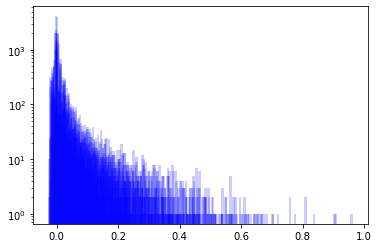

In [339]:
#sns.set_palette("bright")
for i in vst_dt.iloc[:,4:25].columns:
    plt.hist(vst_dt[i], bins=100, alpha=0.2, log=True, color="blue")

In [335]:
## Coordinates anotation 
vst_dt.insert (0, 'chr', cnv['Chr'])
vst_dt.insert (1, 'start', cnv['Start'])
vst_dt.insert (2, 'end', cnv['End'])
vst_dt = vst_dt.round(5)

array([[-0.00323964, -0.00190993, -0.00028502, ...,  0.00078455,
        -0.00329777,  0.00067646],
       [-0.00314236,  0.00519278,  0.005778  , ..., -0.00186837,
         0.00043876, -0.00034767],
       [ 0.00075589,  0.02649689,  0.01399595, ...,  0.01980788,
         0.00164487, -0.00134728],
       ...,
       [ 0.01648818,  0.00200612, -0.00092289, ...,  0.05928591,
         0.00025387,  0.04470492],
       [-0.00288682,  0.00730886,  0.00676116, ..., -0.00131215,
        -0.00318457, -0.00220758],
       [-0.00318574, -0.00350927,  0.00556261, ...,  0.00871113,
         0.00053333, -0.00179054]])

In [334]:
vst_dt.sort_values(by='WestEurasia-Oceania', ascending=False).head(20)
#vst_dt.loc[2148]

,WestEurasia-SouthAsia,WestEurasia-Africa,WestEurasia-CentralAsiaSiberia,WestEurasia-Oceania,WestEurasia-America,WestEurasia-EastAsia,SouthAsia-Africa,SouthAsia-CentralAsiaSiberia,SouthAsia-Oceania,SouthAsia-America,...,Africa-CentralAsiaSiberia,Africa-Oceania,Africa-America,Africa-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-America,CentralAsiaSiberia-EastAsia,Oceania-America,Oceania-EastAsia,America-EastAsia
4519,4.289080e-02,0.049449,4.438455e-01,0.638576,-7.155061e-03,3.991705e-01,0.176414,0.228774,0.441524,0.051333,...,7.087297e-01,0.908775,3.272173e-02,0.560643,0.090934,5.036705e-01,-0.010337,7.571382e-01,9.094791e-02,0.360632
8456,1.754379e-02,0.003349,3.194932e-16,0.588510,NaN,5.578694e-02,-0.004165,-0.009640,0.424569,0.009813,...,-1.507474e-02,0.513913,1.795098e-03,0.020497,0.457335,1.550017e-15,0.008255,4.782223e-01,3.615545e-01,0.030254
5207,NaN,NaN,NaN,0.530129,NaN,NaN,NaN,NaN,0.481942,NaN,...,NaN,0.492702,NaN,NaN,0.444016,NaN,NaN,4.196255e-01,4.964611e-01,NaN
7675,2.149119e-01,0.388552,3.705967e-01,0.519535,2.882578e-01,4.455023e-01,0.023566,0.020030,0.096671,-0.007485,...,-1.470601e-02,0.010796,-7.215893e-03,-0.009563,0.005577,-1.108652e-02,-0.013618,4.980165e-02,9.442794e-04,0.002509
748,-5.464427e-03,0.027253,1.362950e-01,0.462674,-5.805689e-03,1.910166e-01,0.002634,0.090329,0.409889,-0.016481,...,2.761921e-02,0.286071,-5.804153e-03,0.059427,0.126429,6.953608e-02,-0.010638,3.887718e-01,8.047706e-02,0.090821
925,2.847508e-02,-0.000982,1.140795e-02,0.448914,9.800506e-03,-5.926869e-03,0.058010,0.071093,0.278199,0.063282,...,7.875473e-15,0.500555,8.541006e-15,0.008211,0.492883,NaN,0.026076,4.680677e-01,4.060106e-01,0.022907
4830,2.028573e-02,0.356676,-8.687673e-03,0.443596,1.547436e-02,1.275367e-01,0.216801,0.001525,0.339836,0.094601,...,2.914813e-01,0.005090,4.230863e-01,0.074435,0.464740,4.000528e-02,0.082865,6.648724e-01,1.508362e-01,0.194274
1604,2.952759e-01,0.006490,7.474080e-02,0.424195,2.318872e-01,5.097188e-01,0.196921,0.074240,0.065739,-0.015882,...,1.967293e-02,0.361614,1.595723e-01,0.418902,0.283878,6.010767e-02,0.301428,1.114913e-01,3.032455e-15,0.091569
177,7.455909e-03,-0.005412,3.093227e-01,0.421683,2.865210e-01,2.142250e-01,0.018107,0.171363,0.277432,0.155432,...,3.321657e-01,0.445014,3.191998e-01,0.211020,0.003537,-2.128906e-02,-0.006549,4.033023e-03,3.550460e-02,-0.009934
1108,-4.622299e-03,-0.000654,-1.837198e-03,0.413099,2.664376e-02,-2.124419e-03,0.011998,0.012293,0.486655,0.019957,...,-1.473841e-02,0.343243,6.161403e-02,0.017330,0.317806,7.529883e-02,0.017468,5.624297e-01,4.972272e-01,0.014871


In [272]:
#### SAVING VST FILE
vst_dt.to_csv('../data/vst_results.csv')

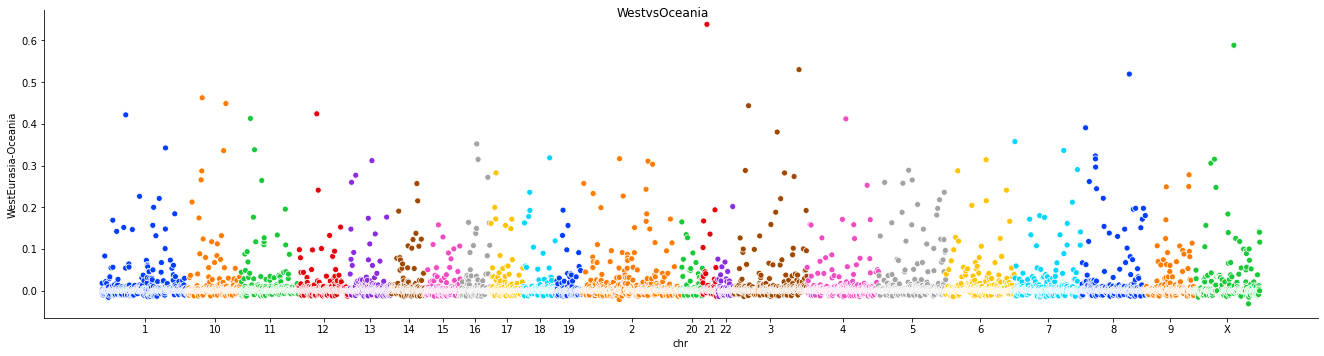

In [273]:
# Simulate DataFrame
vst_dt['i']= vst_dt.index
#vst_dt['log_West_Oceania'] = np.log2(vst_dt['WestEurasia-Oceania'])

# Generate Manhattan plot: (#optional tweaks for relplot: linewidth=0, s=9)
plot = sns.relplot(data=vst_dt, x='i', y='WestEurasia-Oceania', aspect=3.7, 
                  hue='chr', palette = 'bright', legend=None) 
chrom_df=vst_dt.groupby('chr')['i'].median()
plot.ax.set_xlabel('chr'); plot.ax.set_xticks(chrom_df);
plot.ax.set_xticklabels(chrom_df.index)
plot.fig.suptitle('WestvsOceania');

<h1>  Sudmant data 

In [274]:
header= ['Sample', 'Region', 'Country', 'Sample_ID', 'Sex']
studmant_anotation = pd.read_csv('/branchinecta/jbazanwilliamson/Studmant_anotation.csv', names=header, index_col=0)#Studmant data

studmant_data = pd.read_csv('/branchinecta/jbazanwilliamson/Studmant_cnvs.csv')
#studmant_data

In [275]:
coordinates = studmant_data.iloc[:,0:2]
cnvs = studmant_data.iloc[:,6:284]
cnvs = cnvs.T
cnvs = cnvs.fillna(2)
statistics.variance(cnvs[1])
#cnvs[1].var()

4.8401233911286035

In [276]:
sudmant_features = studmant_anotation.loc[:,["Region","Country", "Sex",]]
sudmant_dt = sudmant_features.merge(cnvs, left_index=True, right_index=True)
sudmant_features = sudmant_dt.loc[:,['Region', 'Country', 'Sex']]
sudmant_dt = sudmant_dt[sudmant_dt['Region'].notna()]
sudmant_dt

,Region,Country,Sex,0,1,2,3,4,5,6,...,15002,15003,15004,15005,15006,15007,15008,15009,15010,15011
AFR_BantuKenya_HGDP01414_F,AFR,BantuKenya,F,-1,11,2,2,2,23,2,...,2,2,2,2,2,2,2,6,2,2
AFR_BantuKenya_HGDP01417_M,AFR,BantuKenya,M,22,10,2,2,2,24,2,...,2,2,1,1,1,1,1,6,1,1
AFR_BantuSEHerero_HGDP01028_M,AFR,BantuSEHerero,M,22,10,1,2,2,24,2,...,2,2,1,1,1,1,1,5,1,1
AFR_BantuSEHerero_HGDP01035_M,AFR,BantuSEHerero,M,-1,11,2,2,2,25,2,...,2,2,2,1,1,1,1,6,1,1
AFR_BantuSETswana_HGDP01030_M,AFR,BantuSETswana,M,23,-1,2,2,2,26,1,...,2,2,1,1,1,1,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WEA_SpainIBS_HG01504_F,WEA,SpainIBS,F,-1,12,2,2,2,24,2,...,2,2,2,2,2,2,2,6,2,2
WEA_Tuscan_HGDP01163_M,WEA,Tuscan,M,22,10,2,2,2,25,2,...,2,2,1,1,1,1,1,6,1,1
WEA_Tuscan_HGDP01168_F,WEA,Tuscan,F,-1,12,2,2,2,23,2,...,2,2,3,2,2,2,2,6,2,2
WEA_YemeniteJew_4695_F,WEA,YemeniteJew,F,22,10,2,2,2,23,2,...,2,2,2,2,2,2,2,6,2,2


In [277]:
vst_sudmant = vst_statistic(sudmant_dt,'Region','Sex','Country')
vst_sudmant

,AFR-AMR,AFR-ARC,AFR-EA,AFR-OCN,AFR-SA,AFR-SIB,AFR-WEA,AMR-ARC,AMR-EA,AMR-OCN,...,EA-OCN,EA-SA,EA-SIB,EA-WEA,OCN-SA,OCN-SIB,OCN-WEA,SA-SIB,SA-WEA,SIB-WEA
0,-1.670680e-02,-5.611246e-02,1.356810e-03,-8.946054e-04,-1.521041e-02,-1.583980e-02,-9.271693e-03,-1.004297e-01,-0.002087,-0.004431,...,-0.015387,-0.001179,0.002476,0.011311,-3.436997e-03,0.001362,7.911560e-03,-2.070018e-02,-0.011423,-1.298243e-02
1,2.318631e-03,3.330782e-02,-6.473493e-03,-1.418707e-02,-8.560662e-03,-1.284061e-02,2.310721e-02,2.245902e-01,-0.005326,0.009260,...,-0.007499,-0.016238,-0.017936,0.014672,-1.133203e-02,-0.019884,4.804674e-02,-2.033489e-02,-0.004420,3.974328e-03
2,4.087009e-15,2.536166e-15,2.088607e-15,4.087009e-15,4.718448e-15,1.092876e-15,5.204170e-16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.011480e-15,1.641048e-15,1.342676e-15,3.011480e-15,3.656797e-15,8.743006e-16,1.734723e-16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.750000e-03,1.219512e-03,1.339286e-02,8.750000e-03,1.022727e-02,9.016393e-03,1.505102e-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15007,9.453125e-02,7.352941e-02,-8.522727e-03,-2.956432e-03,-1.518784e-02,5.155510e-02,-1.013605e-02,2.941176e-02,0.060411,0.170611,...,0.012041,-0.011521,0.025847,-0.005292,-5.089158e-03,0.114022,-3.088897e-03,5.025641e-02,-0.011878,5.133148e-02
15008,9.453125e-02,7.352941e-02,-8.522727e-03,-9.581882e-03,-1.498774e-02,5.155510e-02,-1.013605e-02,2.941176e-02,0.060411,0.163265,...,0.002661,-0.007981,0.025847,-0.005292,-1.854744e-02,0.102174,-7.988144e-03,5.923961e-02,-0.012763,5.133148e-02
15009,4.750831e-02,3.846154e-03,-1.325758e-03,2.715517e-02,3.174603e-04,2.796610e-02,2.042105e-02,3.191891e-16,0.025150,0.000000,...,0.007457,-0.013395,0.007692,-0.004350,1.998401e-15,NaN,-5.551115e-16,2.210038e-15,-0.011905,7.025630e-16
15010,9.453125e-02,7.352941e-02,-1.065969e-02,-9.581882e-03,-1.518784e-02,5.155510e-02,-1.013605e-02,2.941176e-02,0.063547,0.163265,...,-0.002990,-0.012853,0.030303,-0.008203,-1.329627e-02,0.102174,-7.988144e-03,5.025641e-02,-0.011878,5.133148e-02


In [278]:
#Coorrdinates
vst_sudmant.insert (0, 'chr', studmant_data['contig'])
vst_sudmant.insert (1, 'start', studmant_data['start'])
vst_sudmant.insert (2, 'end', studmant_data['end'])
vst_sudmant = vst_sudmant.round(5)
vst_sudmant

,chr,start,end,AFR-AMR,AFR-ARC,AFR-EA,AFR-OCN,AFR-SA,AFR-SIB,AFR-WEA,...,EA-OCN,EA-SA,EA-SIB,EA-WEA,OCN-SA,OCN-SIB,OCN-WEA,SA-SIB,SA-WEA,SIB-WEA
0,chr1,12048,177033,-0.01671,-0.05611,0.00136,-0.00089,-0.01521,-0.01584,-0.00927,...,-0.01539,-0.00118,0.00248,0.01131,-0.00344,0.00136,0.00791,-0.02070,-0.01142,-0.01298
1,chr1,12048,89237,0.00232,0.03331,-0.00647,-0.01419,-0.00856,-0.01284,0.02311,...,-0.00750,-0.01624,-0.01794,0.01467,-0.01133,-0.01988,0.04805,-0.02033,-0.00442,0.00397
2,chr1,53897994,53905803,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,114813682,114821317,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,203967055,203977106,0.00875,0.00122,0.01339,0.00875,0.01023,0.00902,0.01505,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15007,chrX,29599756,29609177,0.09453,0.07353,-0.00852,-0.00296,-0.01519,0.05156,-0.01014,...,0.01204,-0.01152,0.02585,-0.00529,-0.00509,0.11402,-0.00309,0.05026,-0.01188,0.05133
15008,chrX,136184011,136198455,0.09453,0.07353,-0.00852,-0.00958,-0.01499,0.05156,-0.01014,...,0.00266,-0.00798,0.02585,-0.00529,-0.01855,0.10217,-0.00799,0.05924,-0.01276,0.05133
15009,chrX,91366346,91368944,0.04751,0.00385,-0.00133,0.02716,0.00032,0.02797,0.02042,...,0.00746,-0.01339,0.00769,-0.00435,0.00000,NaN,-0.00000,0.00000,-0.01190,0.00000
15010,chrX,138508379,138510401,0.09453,0.07353,-0.01066,-0.00958,-0.01519,0.05156,-0.01014,...,-0.00299,-0.01285,0.03030,-0.00820,-0.01330,0.10217,-0.00799,0.05026,-0.01188,0.05133


In [279]:
vst_sudmant.sort_values(by='OCN-WEA', ascending=False)

#### SAVING VST FILE
vst_sudmant.to_csv('../data/vst_sudmant_results.csv')

<h1> T-test for independency 

In [221]:
from scipy import stats

def ttest(data, region_column_name):
    """
    data (object): data with features
    regions_column_names (str): name of column of region in data
    """
    var_cnv = data.groupby(region_column_name).var()

    #### List of counts of regions ###
    regions = data[region_column_name].unique()
    number_of_regions = len(regions)
    numbers = []
    
    for i in range(number_of_regions):
        numbers.append(i)
    
    ### T-test
    ttest = []
    combination_regions = list(combinations(numbers,2))
    
    for i in combination_regions:
        ttest.append(stats.ttest_ind(var_cnv.iloc[i[0]], var_cnv.iloc[i[1]]))

    result_ttest = []
    for i in ttest:
        result_ttest.append([i[0], i[1]])
        
    #### ADD pair-population names #####    
    combination_names = []
    for i in list(combinations(var_cnv.index,2)):
        combination_names.append(i[0]+str('-')+i[1])
        
    ttest_df = pd.DataFrame(result_ttest)
    ttest_df = ttest_df.set_axis(combination_names) 
    ttest_df.columns = ['statistic', 'pvalue']

    
    return(ttest_df)

    

In [222]:
ttest_df = ttest(sudmant_dt, 'Region')

Text(0.5, 1.0, 'Sudmant')

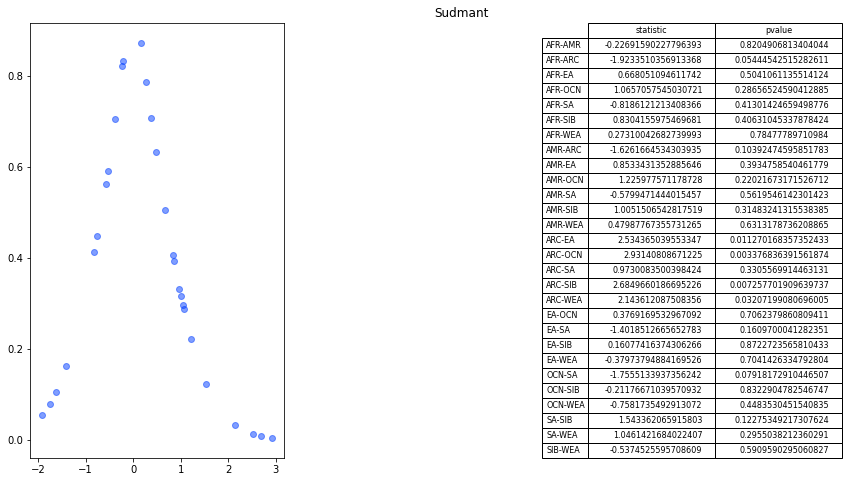

In [223]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(121)
ax1.scatter(x=ttest_df['statistic'],y=ttest_df['pvalue'], alpha=0.5)

ax2 = fig.add_subplot(122)
font_size=8
bbox=[1, 0, 1, 1]
ax2.axis('off')
mpl_table = ax2.table(cellText = ttest_df.values, rowLabels = ttest_df.index, bbox=bbox, colLabels=ttest_df.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)
plt.title("Sudmant")

Text(0.5, 1.0, 'My Data')

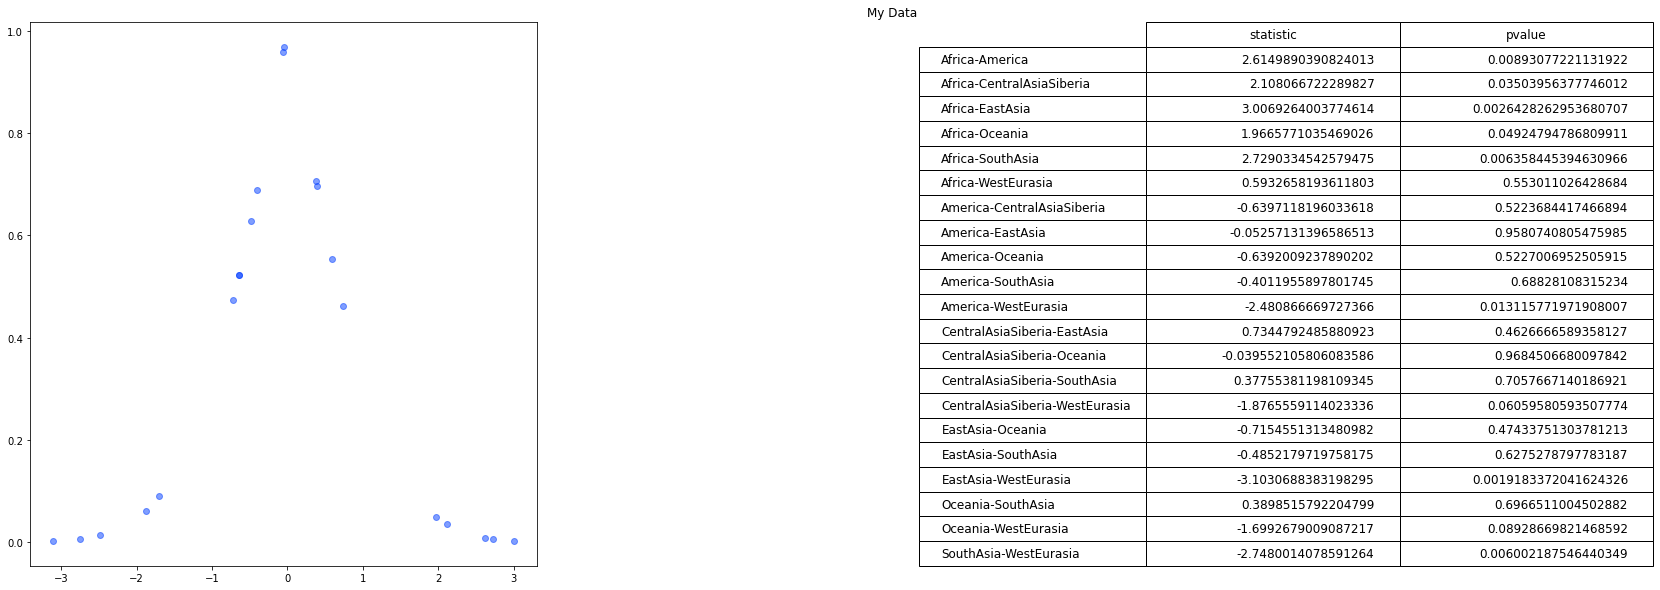

In [224]:
ttest_df = ttest(dt, '10-Region')
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
ax1.scatter(x=ttest_df['statistic'],y=ttest_df['pvalue'], alpha=0.5)

ax2 = fig.add_subplot(122)
font_size= 12
bbox=[1, 0, 1,1]
ax2.axis('off')
mpl_table = ax2.table(cellText = ttest_df.values, rowLabels = ttest_df.index, bbox=bbox, colLabels=ttest_df.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)
plt.title("My Data")

<h2> Computing permutation for each pair-group whole samples

In [319]:
import copy
import random

####### Groupby regions #######
dt_group = dt.groupby('10-Region')

dt_groupped = []
regions = anotation['10-Region'].unique()
for i in regions:
    dt_groupped.append(dt_group.get_group(str(i)))



In [373]:
dt_group.get_group(str('Africa'))[0]

LP6005442-DNA_G11    1.843697
LP6005442-DNA_H11    2.265150
LP6005443-DNA_G08    1.545413
LP6005441-DNA_B11    1.680085
LP6005441-DNA_A11    1.590700
LP6005443-DNA_H08    2.233305
LP6005443-DNA_B09    1.644760
LP6005442-DNA_D09    1.965110
LP6005441-DNA_F01    1.141784
LP6005443-DNA_E02    1.312654
LP6005441-DNA_A08    1.263408
LP6005592-DNA_C03    1.415559
LP6005441-DNA_G02    1.961170
LP6005441-DNA_H02    1.964910
LP6005442-DNA_F11    1.224282
LP6005442-DNA_A02    1.635050
LP6005442-DNA_B02    2.068945
LP6005443-DNA_G02    1.277620
LP6005443-DNA_F02    1.984780
LP6005442-DNA_G10    2.209030
LP6005442-DNA_H10    1.073908
SS6004480            1.947480
LP6005619-DNA_C01    1.934230
LP6005619-DNA_B01    1.691370
SS6004473            1.862735
SS6004470            1.886620
LP6005443-DNA_E06    1.457820
LP6005443-DNA_F06    2.039170
LP6005441-DNA_E07    2.050630
LP6005441-DNA_F07    1.068603
LP6005677-DNA_D03    1.720430
LP6005592-DNA_C05    1.587975
LP6005442-DNA_A10    1.955230
LP6005442-

In [441]:
def vst_gt(x, y):
    
    ####### Groupby regions #######
    ######## V = within-population variance ######
    vx = np.var(x, axis=0)
    vy = np.var(y, axis=0)
    ########### N =  numbers of individuals sampled from population each cnv ##############    
    nx = x.sum()
    
    ny = y.sum()
    
    ######## Vt = total variance across all individuals of the pair of populations ########
    #vt = pd.concat([x,y]).var()
    vt = np.concatenate((x,y)).var()
    ########## Vs ################## 
    ### Vs = (V1*n1+V2*n2)/(n1+n2) 
    ## where V1 is the within-population variance of population 1, 
    ## V2 is the within population variance of population 2, 
    #n1 and n2 are the numbers of individuals sampled from population 1 and 2, respectively.
    v1 = vx*nx
    v2 = vy*ny
    ns = nx+ny
    vs = (v1+v2)/ ns
    ########## Vst #################
    #####(VT−VS)/VT
    
    vst = (vt-vs)/vt
        
    return(vst)
    

In [443]:
from stattools.resampling import PermutationTest
PermutationTest

stattools.resampling.permutation.PermutationTest

In [444]:
pt = PermutationTest(dt_group.get_group(str('WestEurasia'))[176], dt_group.get_group(str('America'))[176], stat=vst_gt, n_perm=999)

In [445]:
p_value_ = pt.p_value()
print(f"p-value: {p_value_:.4f}")

p-value: 0.0160


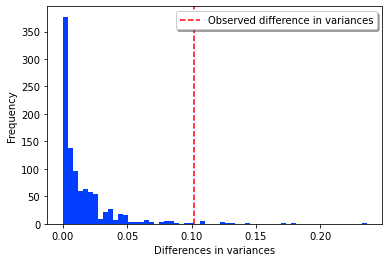

In [446]:
plt.figure()
plt.hist(pt.dist, bins="auto")
plt.axvline(pt.observed, c="r", ls="--", label="Observed difference in variances")
plt.legend(loc="best", frameon=True, shadow=True)
plt.xlabel("Differences in variances")
plt.ylabel("Frequency")
plt.show()
plt.close()

<h2> I ran this as a job cause takes a while (~12 hrs)

In [397]:
p_value_permutation = []

combination_regions = list(combinations([0,1,2,3,4,5,6],2))
for region in combination_regions:
    
    p_value= []
    p_value_permutation.append(p_value)
    for i in range(10):
        permutation = PermutationTest(dt_groupped[region[0]][i], dt_groupped[region[1]][i], stat=vst_gt, n_perm=999)#mean_gt
        p_value.append(permutation.p_value())

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


In [398]:
names = []
regions = dt['10-Region'].unique()
for i in list(combinations(regions,2)):
    names.append(i[0]+str('-')+i[1])


In [399]:
permutation_df = pd.DataFrame(p_value_permutation)
permutation_df = permutation_df.set_axis(names)
permutation_df

,0,1,2,3,4,5,6,7,8,9
WestEurasia-SouthAsia,0.898,0.330,0.434,0.665,0.737,0.115,0.331,0.689,0.613,0.160
WestEurasia-Africa,0.305,0.003,0.023,0.783,0.970,0.001,1.000,0.350,0.358,0.776
WestEurasia-CentralAsiaSiberia,0.117,0.759,0.267,0.120,0.567,0.289,0.205,0.148,0.162,0.920
WestEurasia-Oceania,0.045,0.499,0.312,0.595,0.787,0.001,0.190,0.167,0.429,0.411
WestEurasia-America,0.605,0.127,0.067,1.000,0.217,0.001,0.143,0.399,0.195,0.411
WestEurasia-EastAsia,0.936,0.828,0.429,0.288,0.558,0.109,0.034,0.361,0.721,0.768
SouthAsia-Africa,0.399,0.001,0.009,0.113,0.619,0.192,0.303,0.794,0.981,0.229
SouthAsia-CentralAsiaSiberia,0.126,0.575,0.095,0.501,0.780,0.807,0.599,0.567,0.596,0.107
SouthAsia-Oceania,0.057,0.918,0.144,0.465,0.768,0.738,0.582,0.802,0.923,0.114
SouthAsia-America,0.746,0.085,0.028,0.713,0.586,0.781,0.654,0.891,0.562,0.127


<h1> Results from job

In [235]:
results_permutation = pd.read_csv("../data/permutation_results.csv", index_col=0)
results_permutation

,0,1,2,3,4,5,6,7,8,9,...,8640,8641,8642,8643,8644,8645,8646,8647,8648,8649
WestEurasia-SouthAsia,0.57980,0.43961,0.64050,0.81304,0.89669,0.06841,0.18251,0.17623,0.29525,0.13185,...,0.90454,0.29387,0.49403,0.74653,0.77368,1.00000,0.56241,0.62209,0.48522,0.50272
WestEurasia-Africa,0.16312,0.01284,0.43232,0.72864,0.99786,1.00000,1.00000,0.37192,0.37423,0.76484,...,0.12837,0.28750,0.16052,0.26677,0.76377,0.09604,0.22604,0.27887,0.81578,0.27379
WestEurasia-CentralAsiaSiberia,0.13732,0.26657,0.24473,0.08175,0.70562,0.26566,0.26886,0.26723,0.26368,0.85806,...,0.81242,0.35157,0.89008,0.88787,0.80160,0.80019,0.41254,0.37684,0.42746,0.89603
WestEurasia-Oceania,0.00543,0.77408,0.37491,0.67366,0.27220,1.00000,0.24645,0.19837,1.00000,0.47410,...,0.78836,0.58773,0.32113,0.53183,0.81445,0.81139,0.09215,0.07790,0.40811,0.05284
WestEurasia-America,0.32838,0.23119,0.21531,0.66589,0.22872,1.00000,0.18786,1.00000,0.22976,0.40108,...,0.35971,0.75212,0.22970,0.05814,0.82279,0.82212,0.62404,0.58205,0.38557,0.47987
WestEurasia-EastAsia,0.92707,0.80976,0.15093,0.28068,0.55395,0.13547,0.05335,0.12410,0.38391,0.67116,...,0.12767,0.43309,0.56005,0.81680,0.76171,0.52230,0.37311,0.33705,0.51827,0.83544
SouthAsia-Africa,0.42345,0.00001,0.26413,0.11714,0.54128,0.12525,0.18066,1.00000,1.00000,0.23390,...,0.44638,1.00000,0.43489,0.43298,1.00000,0.22701,0.70930,0.70723,1.00000,0.82581
SouthAsia-CentralAsiaSiberia,0.30460,0.88730,0.11482,0.42492,0.75542,0.75668,0.71190,0.70838,0.73446,0.16459,...,0.96958,1.00000,0.47932,0.77825,1.00000,1.00000,0.26584,0.26580,1.00000,0.72997
SouthAsia-Oceania,0.00101,0.75771,0.63863,0.58965,0.60138,0.60032,0.73536,0.92374,1.00000,0.14118,...,0.98811,0.37851,0.95073,0.95251,1.00000,1.00000,0.00066,0.00057,1.00000,0.00416
SouthAsia-America,0.18560,0.12484,0.14037,0.57817,0.36041,0.59508,0.67268,0.69556,0.73780,0.07470,...,0.96797,1.00000,0.08478,0.08298,1.00000,1.00000,0.40042,0.40348,0.29472,0.98222


In [236]:
boolean = (results_permutation<=0.05)


## Deleting columns where none of the regions passed the imputation
boolean = boolean.loc[:, boolean.any()]
boolean

,0,1,3,10,11,19,20,31,33,36,...,8631,8632,8634,8636,8642,8643,8645,8646,8647,8649
WestEurasia-SouthAsia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
WestEurasia-Africa,False,True,False,False,False,True,False,False,True,False,...,True,True,True,True,False,False,False,False,False,False
WestEurasia-CentralAsiaSiberia,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
WestEurasia-Oceania,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
WestEurasia-America,False,False,False,True,False,False,False,True,False,True,...,False,True,False,True,False,False,False,False,False,False
WestEurasia-EastAsia,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
SouthAsia-Africa,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
SouthAsia-CentralAsiaSiberia,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
SouthAsia-Oceania,True,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,True
SouthAsia-America,False,False,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False


In [237]:
name_1 = []
name_2 = []

for i,row in boolean.iterrows():
    ls_1 = [(i.split("-")[0])]
    ls_2 = [i.split("-")[1]]
    #ls_1.append(i.split("-")[0])
    name_1.append(i.split("-")[0])
    name_2.append(i.split("-")[1])
    #ls.append(ls_1)
    #ls.append(ls_2)


In [238]:
boolean.insert (0, 'group_1', name_1)
boolean.insert (1, 'group_2', name_2)

In [239]:
group = []
for index,row in boolean.iterrows():
        if row[0] == 'Africa' or row[1] == 'Africa':
            group.append(row)
            
pd.DataFrame(group)

,group_1,group_2,0,1,3,10,11,19,20,31,...,8631,8632,8634,8636,8642,8643,8645,8646,8647,8649
WestEurasia-Africa,WestEurasia,Africa,False,True,False,False,False,True,False,False,...,True,True,True,True,False,False,False,False,False,False
SouthAsia-Africa,SouthAsia,Africa,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Africa-CentralAsiaSiberia,Africa,CentralAsiaSiberia,False,True,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,True,False
Africa-Oceania,Africa,Oceania,True,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,True,True
Africa-America,Africa,America,True,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
Africa-EastAsia,Africa,EastAsia,False,True,False,False,False,True,True,False,...,False,False,False,False,False,False,True,True,True,False


In [240]:
group = []
#one_group = []
for region in regions:
    one_group = []
    for index,row in boolean.iterrows():
        if region == row[0] or region == row[1] :
            one_group.append(row)
            
    group.append(one_group)

In [241]:
boolean_groupped = pd.DataFrame(group) 
#pd.DataFrame(group[0]).sum()

In [242]:
summary = []
for i in group:
    summary.append(pd.DataFrame(i).sum())


In [243]:
summary_df = pd.DataFrame(summary)
summary_df = summary_df.drop(columns=['group_1', 'group_2'])
summary_df.insert (0, 'region', regions)

summary_df.max(numeric_only=True)


0       5
1       5
3       1
10      2
11      1
       ..
8643    2
8645    1
8646    3
8647    3
8649    3
Length: 2171, dtype: int64

In [244]:
summary_df

,region,0,1,3,10,11,19,20,31,33,...,8631,8632,8634,8636,8642,8643,8645,8646,8647,8649
0,WestEurasia,1,1,0,1,0,1,0,1,1,...,1,3,2,4,0,0,0,0,0,0
1,SouthAsia,1,1,0,0,1,0,1,0,0,...,0,2,1,1,0,0,0,1,1,1
2,Africa,2,5,1,0,0,2,2,0,2,...,1,1,1,2,1,1,1,3,3,1
3,CentralAsiaSiberia,2,1,1,0,0,0,3,1,0,...,0,1,0,2,0,0,0,1,1,1
4,Oceania,5,1,0,0,1,0,1,0,0,...,0,0,1,3,0,0,0,2,2,3
5,America,2,0,0,2,0,0,0,3,0,...,0,3,0,2,2,2,0,0,0,0
6,EastAsia,1,1,0,1,0,1,1,1,1,...,0,2,1,0,1,1,1,1,1,0


In [245]:
data = []
for index,row in summary_df.T.iterrows():
    if (row[row==5].count()) or (row[row==6].count()) or (row[row==4].count()):
        if (row[row==1].count()) > 3 and (row[row==2].count()) <1 :
            
            data.append(row)
     #   if (row[row<=0.05].count()) < 7:
      #      data.append([row])
            

In [246]:
pd.DataFrame(data)

,0,1,2,3,4,5,6
1,1,1,5,1,1,0,1
42,1,1,1,1,1,1,6
45,1,1,5,1,1,0,1
59,1,1,6,1,1,1,1
67,1,1,1,0,4,0,1
...,...,...,...,...,...,...,...
8540,0,1,0,1,1,4,1
8568,1,1,1,1,0,4,0
8586,1,1,6,1,1,1,1
8607,0,1,5,1,1,1,1


<h1> Vst group vs allothers

In [247]:
dt_g = dt.groupby('10-Region')

regions = dt['10-Region'].unique()

### total variance
vt_input = dt.var()

vt= []
for i in regions:
    vt.append(vt_input)


    
    ####### Groupby regions #######
dt_groupped = []

for i in regions:
        dt_groupped.append(dt_g.get_group(str(i)))   

    ######## V = within-population variance ######
v = []
for i in dt_groupped:
    v.append((i.var()))#You can add log2 transformation here as np.log2(i.var())

    
    
    ########### N =  numbers of individuals sampled from population each cnv ##############
n = dt_g.count()
n = n.drop(columns=['7-Gender', '11-Country'])
n = n.reindex(regions)
n = np.array(n)


### Vs

v2_var = []
for i in regions:
    v2_var.append(dt.drop(dt_g.get_group(i).index).var())
    

    

v1 = (v*n)
v2 = (v2_var*(276-n))

vs =(v1+v2)/ 276  

vst = []

vst.append((vt-vs)/vt)


vst_dt = np.array(vst)
vst = vst_dt.reshape((7,8650))
vst_dt = pd.DataFrame(vst)

vst_dt = vst_dt.set_axis(regions)

vst_dt =vst_dt.T

vst_dt
    


,WestEurasia,SouthAsia,Africa,CentralAsiaSiberia,Oceania,America,EastAsia
0,-0.003240,-0.003142,0.000756,0.007161,0.016488,-0.002887,-0.003186
1,-0.001910,0.005193,0.026497,-0.007377,0.002006,0.007309,-0.003509
2,-0.000285,0.005778,0.013996,-0.000286,-0.000923,0.006761,0.005563
3,-0.000736,-0.003681,0.004608,0.001228,0.002313,0.002103,0.001593
4,-0.000771,-0.002202,-0.001301,-0.003358,0.001958,-0.009029,-0.002785
...,...,...,...,...,...,...,...
8645,-0.003816,-0.004060,0.028021,0.002699,0.002370,0.002156,0.004980
8646,0.001076,-0.001913,0.020025,0.007297,0.059640,-0.001345,0.008625
8647,0.000785,-0.001868,0.019808,0.007353,0.059286,-0.001312,0.008711
8648,-0.003298,0.000439,0.001645,0.000289,0.000254,-0.003185,0.000533


In [248]:
## Coordinates anotation 
vst_dt.insert (0, 'chr', cnv['Chr'])
vst_dt.insert (1, 'start', cnv['Start'])
vst_dt.insert (2, 'end', cnv['End'])
vst_dt = vst_dt.round(5)
vst_dt

,chr,start,end,WestEurasia,SouthAsia,Africa,CentralAsiaSiberia,Oceania,America,EastAsia
0,1,228416,267160,-0.00324,-0.00314,0.00076,0.00716,0.01649,-0.00289,-0.00319
1,1,471226,471326,-0.00191,0.00519,0.02650,-0.00738,0.00201,0.00731,-0.00351
2,1,712534,763301,-0.00029,0.00578,0.01400,-0.00029,-0.00092,0.00676,0.00556
3,1,763301,763482,-0.00074,-0.00368,0.00461,0.00123,0.00231,0.00210,0.00159
4,1,769541,787076,-0.00077,-0.00220,-0.00130,-0.00336,0.00196,-0.00903,-0.00278
...,...,...,...,...,...,...,...,...,...,...
8645,X,154776475,154788811,-0.00382,-0.00406,0.02802,0.00270,0.00237,0.00216,0.00498
8646,X,154788811,154840186,0.00108,-0.00191,0.02002,0.00730,0.05964,-0.00134,0.00863
8647,X,154789310,154826421,0.00078,-0.00187,0.01981,0.00735,0.05929,-0.00131,0.00871
8648,X,154892549,154908191,-0.00330,0.00044,0.00164,0.00029,0.00025,-0.00318,0.00053


In [249]:
vst_dt.sort_values(by='Oceania', ascending=False).head(20)

,chr,start,end,WestEurasia,SouthAsia,Africa,CentralAsiaSiberia,Oceania,America,EastAsia
5207,3,177002636,177011374,0.01933,0.00868,0.01000,0.00572,0.57541,0.00457,0.01055
8456,X,93395090,93408524,0.03503,0.00007,0.01040,0.00371,0.41545,0.00827,-0.00347
925,10,91998319,92002307,0.01321,-0.00061,0.01540,0.01351,0.33560,0.01079,0.00074
6393,6,30065894,30068872,0.01098,0.00493,0.00568,0.00325,0.32665,0.00259,0.00599
2882,16,85101681,85104890,0.00755,0.00532,0.00613,0.00350,0.31503,0.00280,0.00646
8284,X,31529162,31554252,0.00710,-0.00061,0.01149,0.00524,0.30856,0.00956,0.00096
8119,9,131362536,131365905,0.01043,0.00468,0.00232,0.00309,0.27957,0.00246,0.00569
1108,11,21847054,21849813,0.00590,0.00811,-0.00347,-0.00378,0.27158,0.01657,0.01241
6026,5,79900557,79910136,0.01389,-0.00194,-0.00086,0.00411,0.25757,0.00328,0.00758
3195,18,12196209,12196772,0.01179,0.00211,-0.00036,0.00349,0.24802,0.00278,0.00643


<h2> T-test for independency

In [250]:
var_cnv = dt.groupby('10-Region').var()

whole_variance = pd.DataFrame(v2_var)
    #### List of counts of regions ###
regions = dt['10-Region'].unique()
number_of_regions = len(regions)

numbers = []
    
for i in range(number_of_regions):
    numbers.append(i)
    
### T-test
ttest = []

for i in numbers:
    ttest.append(stats.ttest_ind(var_cnv.iloc[i], whole_variance.iloc[i]))


ttest_df = pd.DataFrame(ttest)
ttest_df = ttest_df.set_axis(regions) 
ttest_df.columns = ['statistic', 'pvalue']


In [251]:
ttest_df

,statistic,pvalue
WestEurasia,1.368647,0.171128
SouthAsia,-2.112797,0.034632
Africa,-0.834642,0.403931
CentralAsiaSiberia,-2.517351,0.011833
Oceania,-1.209224,0.226593
America,-2.129931,0.033191
EastAsia,0.241808,0.808932


In [252]:
filtering_vst_allothers = pd.DataFrame(vst).set_axis(regions)>=0.2

## Deleting columns where none of the regions passed the imputation
filtering_vst_allothers = filtering_vst_allothers.loc[:, filtering_vst_allothers.any()]
filtering_vst_allothers

,36,201,455,474,494,510,548,661,710,740,...,8284,8306,8307,8322,8405,8406,8456,8562,8563,8586
WestEurasia,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
SouthAsia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Africa,False,True,True,False,True,True,False,True,False,False,...,False,True,True,False,False,False,False,False,False,True
CentralAsiaSiberia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Oceania,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,True,False,False,False
America,True,False,False,False,False,False,True,False,True,False,...,False,False,False,False,True,True,False,True,True,False
EastAsia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<h1> Permutation each group vs all other

<h2> Permutation results from job

In [254]:
## Results from permutation_group_vs_allothers.py
results_permutation_allothers = pd.read_csv("../data/permutation_results_group_vs_allothers.csv", index_col=0)
results_permutation_allothers

,0,1,2,3,4,5,6,7,8,9,...,8640,8641,8642,8643,8644,8645,8646,8647,8648,8649
WestEurasia,0.8439,0.7434,0.6786,0.6095,0.5984,0.3256,0.1687,0.3840,0.4688,0.9394,...,0.2024,0.0241,0.5809,0.7899,0.0756,0.9326,0.2244,0.2875,0.6812,0.2041
SouthAsia,0.3907,0.4461,0.9696,0.8255,0.6883,0.7324,0.8119,0.7725,0.6974,0.1469,...,0.6116,0.3117,0.6412,0.8017,0.6328,0.8500,0.8842,0.9080,0.6311,0.7829
Africa,0.0511,0.1070,0.3201,0.1975,0.5652,0.4600,0.3014,0.1625,0.1585,0.6308,...,0.2730,0.6423,0.1584,0.1415,0.7313,0.0054,0.4107,0.4342,0.9267,0.5008
CentralAsiaSiberia,0.0531,0.1291,0.2149,0.0364,0.9726,0.1189,0.7322,0.9446,0.9705,0.9610,...,0.8118,0.3223,0.5202,0.8869,0.9091,0.5530,0.0691,0.0715,0.9192,0.6538
Oceania,0.0005,0.8460,0.5584,0.5729,0.4276,0.7683,0.8345,0.7339,0.6544,0.3945,...,0.8574,0.7913,0.4249,0.4219,0.4571,0.2234,0.1134,0.1143,0.9265,0.0363
America,0.2300,0.1341,0.1821,0.3815,0.0778,0.7056,0.7202,0.3654,0.9703,0.4139,...,0.2942,0.2783,0.0131,0.0100,0.8650,0.5578,0.1588,0.1617,0.1414,0.8281
EastAsia,0.9910,0.9959,0.0391,0.3371,0.8143,0.1350,0.0548,0.8846,0.9142,0.5553,...,0.3716,0.9475,0.7469,0.9764,0.5321,0.2962,0.0256,0.0229,0.8099,0.1897


In [255]:
boolean_allothers = (results_permutation_allothers<=0.05)

## Deleting columns where none of the regions passed the imputation
boolean_allothers = boolean_allothers.loc[:, boolean_allothers.any()]

In [256]:
boolean_allothers

,0,2,3,10,13,16,19,25,27,31,...,8632,8636,8637,8641,8642,8643,8645,8646,8647,8649
WestEurasia,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,False,False,False,False
SouthAsia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Africa,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,True,False,False,False
CentralAsiaSiberia,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
Oceania,True,False,False,False,True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
America,False,False,False,True,False,False,False,False,False,True,...,True,False,False,False,True,True,False,False,False,False
EastAsia,False,True,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False


<h2> Venn diagram

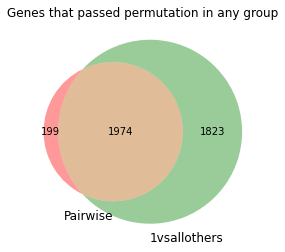

In [257]:
#PERMUTATION RESULTS
inner = len(pd.concat([boolean.T, boolean_allothers.T], axis=1, join="inner"))
left = len(boolean.T) - inner
right = len(boolean_allothers.T) -inner 


venn2(subsets = (left, right, inner), set_labels = ('Pairwise', '1vsallothers'))
plt.title('Genes that passed permutation in any group')
plt.show()

In [258]:
filtering_vst_allothers

,36,201,455,474,494,510,548,661,710,740,...,8284,8306,8307,8322,8405,8406,8456,8562,8563,8586
WestEurasia,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
SouthAsia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Africa,False,True,True,False,True,True,False,True,False,False,...,False,True,True,False,False,False,False,False,False,True
CentralAsiaSiberia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Oceania,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,True,False,False,False
America,True,False,False,False,False,False,True,False,True,False,...,False,False,False,False,True,True,False,True,True,False
EastAsia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


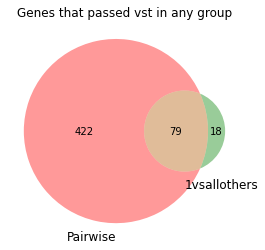

In [259]:
# VST RESULTS 
inner = len(pd.concat([filtering_vst_allothers.T, filtering_vst.T], axis=1, join="inner"))
left = len(filtering_vst.T) - inner
right = len(filtering_vst_allothers.T) -inner 


venn2(subsets = (left, right, inner), set_labels = ('Pairwise', '1vsallothers'))
plt.title('Genes that passed vst in any group')
plt.show()

In [260]:
pd.concat([filtering_vst_allothers.T, filtering_vst.T])

,WestEurasia,SouthAsia,Africa,CentralAsiaSiberia,Oceania,America,EastAsia,WestEurasia-SouthAsia,WestEurasia-Africa,WestEurasia-CentralAsiaSiberia,...,Africa-CentralAsiaSiberia,Africa-Oceania,Africa-America,Africa-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-America,CentralAsiaSiberia-EastAsia,Oceania-America,Oceania-EastAsia,America-EastAsia
36,False,False,False,False,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,False,False,True,False,False,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455,False,False,True,False,False,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
474,True,False,False,False,False,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
494,False,False,True,False,False,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,...,False,False,False,False,False,False,False,False,False,False
8588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,...,False,False,False,False,True,False,False,True,True,False
8647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,...,False,False,False,False,True,False,False,True,True,False
